# VL 2 Statische Visualisierung

# Setup

In [12]:
# Installation der benötigten Pakete
%pip install gapminder pandas plotnine

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Importiere benötigte Bibliotheken
import pandas as pd
from plotnine import *
from gapminder import gapminder
import numpy as np

# Gapminder Daten laden

In [2]:
# Zeige die ersten Zeilen des Datensatzes
print(gapminder.head())

# Daten für Deutschland filtern
germany_data = gapminder[gapminder['country'] == 'Germany']
print(germany_data.head())

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106
     country continent  year  lifeExp       pop     gdpPercap
564  Germany    Europe  1952     67.5  69145952   7144.114393
565  Germany    Europe  1957     69.1  71019069  10187.826650
566  Germany    Europe  1962     70.3  73739117  12902.462910
567  Germany    Europe  1967     70.8  76368453  14745.625610
568  Germany    Europe  1972     71.0  78717088  18016.180270


In [3]:
# Beschreibe die Daten
print(gapminder.describe())

# Deutschland Daten beschreiben
print(germany_data.describe())

             year      lifeExp           pop      gdpPercap
count  1704.00000  1704.000000  1.704000e+03    1704.000000
mean   1979.50000    59.474439  2.960121e+07    7215.327081
std      17.26533    12.917107  1.061579e+08    9857.454543
min    1952.00000    23.599000  6.001100e+04     241.165876
25%    1965.75000    48.198000  2.793664e+06    1202.060309
50%    1979.50000    60.712500  7.023596e+06    3531.846988
75%    1993.25000    70.845500  1.958522e+07    9325.462346
max    2007.00000    82.603000  1.318683e+09  113523.132900
              year    lifeExp           pop     gdpPercap
count    12.000000  12.000000  1.200000e+01     12.000000
mean   1979.500000  73.444417  7.754704e+07  20556.684433
std      18.027756   3.872603  4.341644e+06   8076.261913
min    1952.000000  67.500000  6.914595e+07   7144.114393
25%    1965.750000  70.675000  7.571112e+07  14284.834935
50%    1979.500000  73.150000  7.824802e+07  21272.226985
75%    1993.250000  76.387500  8.095109e+07  26826.198

In [4]:
# Filter für 1952 und 2007
gm_1952 = gapminder[gapminder['year'] == 1952].copy()
gm_2007 = gapminder[gapminder['year'] == 2007].copy()

# Korrelationsmatrizen (nur numerische Variablen)
corr_1952 = gm_1952[['lifeExp', 'pop', 'gdpPercap']].corr()
corr_2007 = gm_2007[['lifeExp', 'pop', 'gdpPercap']].corr()

print("=== Correlation Matrix – 1952 ===")
print(corr_1952.round(3))
print("\n=== Correlation Matrix – 2007 ===")
print(corr_2007.round(3))


=== Correlation Matrix – 1952 ===
           lifeExp    pop  gdpPercap
lifeExp      1.000 -0.003      0.278
pop         -0.003  1.000     -0.025
gdpPercap    0.278 -0.025      1.000

=== Correlation Matrix – 2007 ===
           lifeExp    pop  gdpPercap
lifeExp      1.000  0.048      0.679
pop          0.048  1.000     -0.056
gdpPercap    0.679 -0.056      1.000


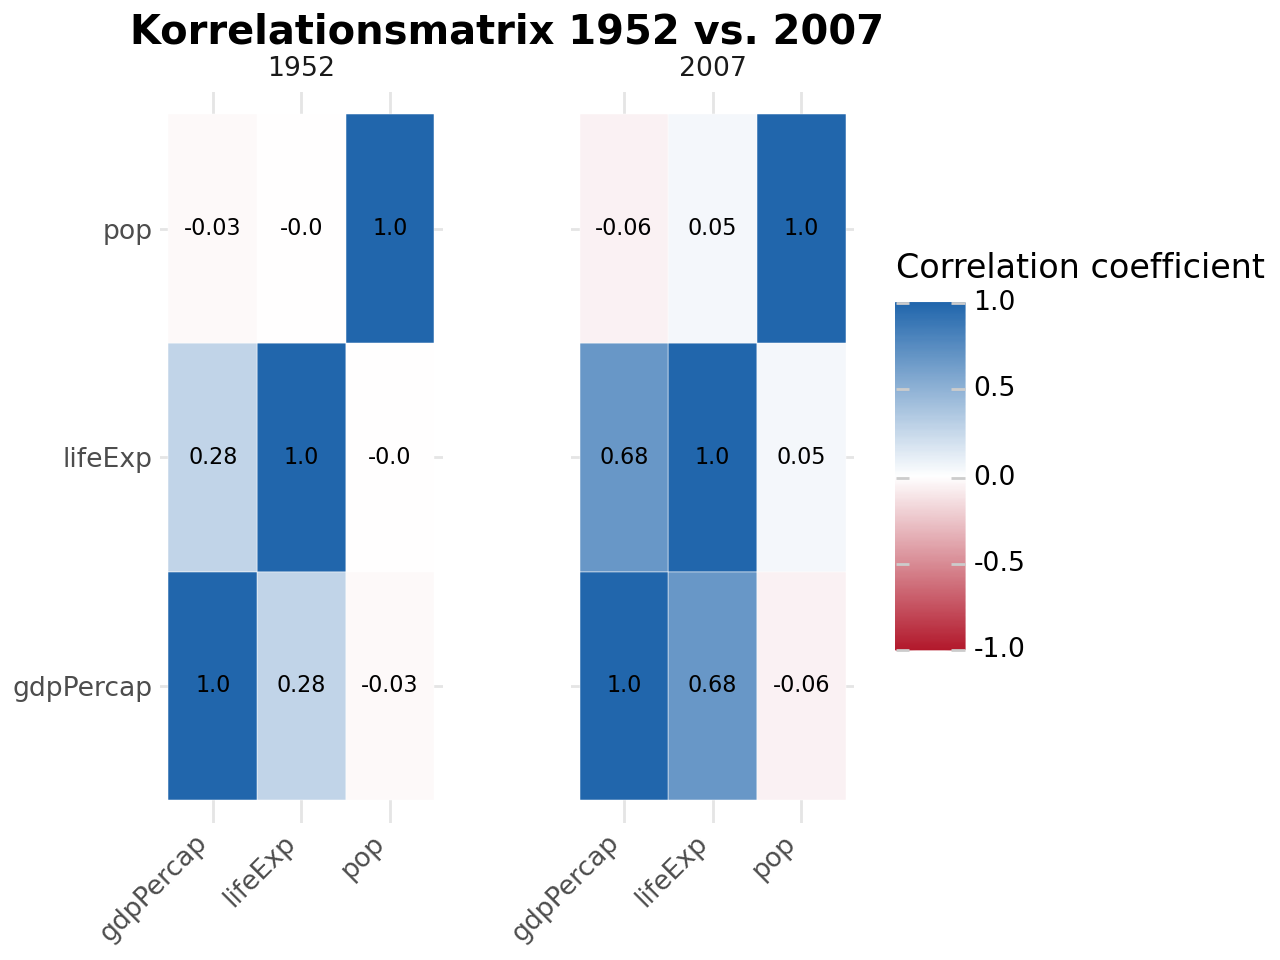

In [5]:
# --- Datenvorbereitung ---
gm_1952 = gapminder[gapminder['year'] == 1952][['lifeExp', 'pop', 'gdpPercap']].corr().reset_index().melt(id_vars='index')
gm_1952['year'] = '1952'

gm_2007 = gapminder[gapminder['year'] == 2007][['lifeExp', 'pop', 'gdpPercap']].corr().reset_index().melt(id_vars='index')
gm_2007['year'] = '2007'

# Kombinieren
corr_df = pd.concat([gm_1952, gm_2007])
corr_df.columns = ['var1', 'var2', 'correlation', 'year']

# --- Plot ---
(
    ggplot(corr_df, aes(x='var1', y='var2', fill='correlation')) +
    geom_tile(color='white') +
    facet_wrap('~year') +
    geom_text(aes(label='round(correlation,2)'), color='black', size=8) +
    scale_fill_gradient2(low='#b2182b', mid='white', high='#2166ac', limits=(-1,1)) +
    labs(
        title='Korrelationsmatrix 1952 vs. 2007',
        subtitle='',
        x='', y='', fill='Correlation coefficient'
    ) +
    theme_minimal(base_size=12) +
    theme(
        axis_text_x=element_text(rotation=45, ha='right'),
        panel_spacing_x=0.1,
        plot_title=element_text(weight='bold')
    )
)



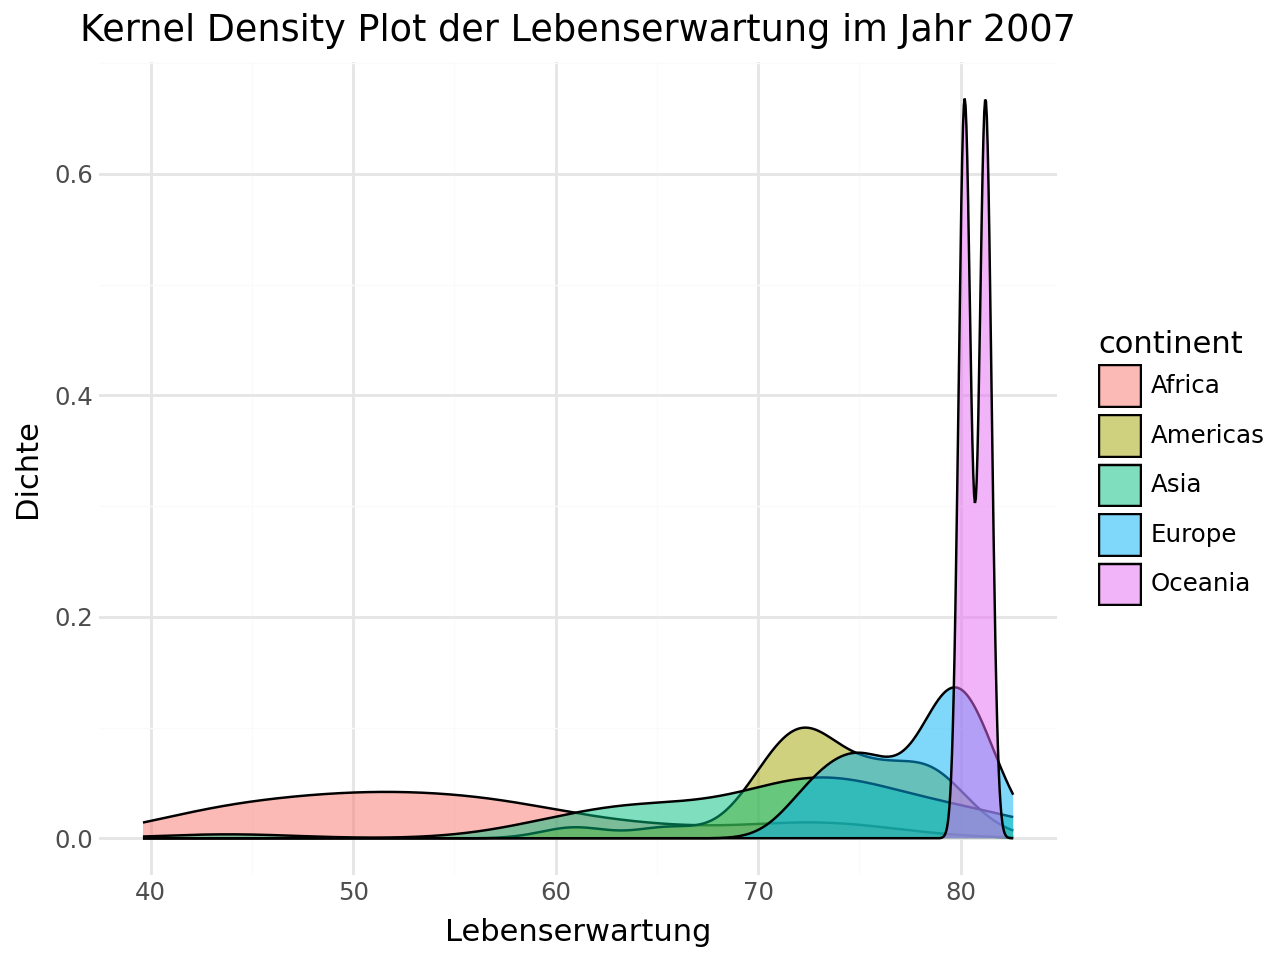

In [6]:
# Kernel density plot 2007 für Lebenserwartung
data_2007 = gapminder[gapminder['year'] == 2007]
(
    ggplot(data_2007, aes(x='lifeExp', fill='continent')) +
    geom_density(alpha=0.5) +
    labs(title='Kernel Density Plot der Lebenserwartung im Jahr 2007',
         x='Lebenserwartung',
         y='Dichte') +
    theme_minimal()
)

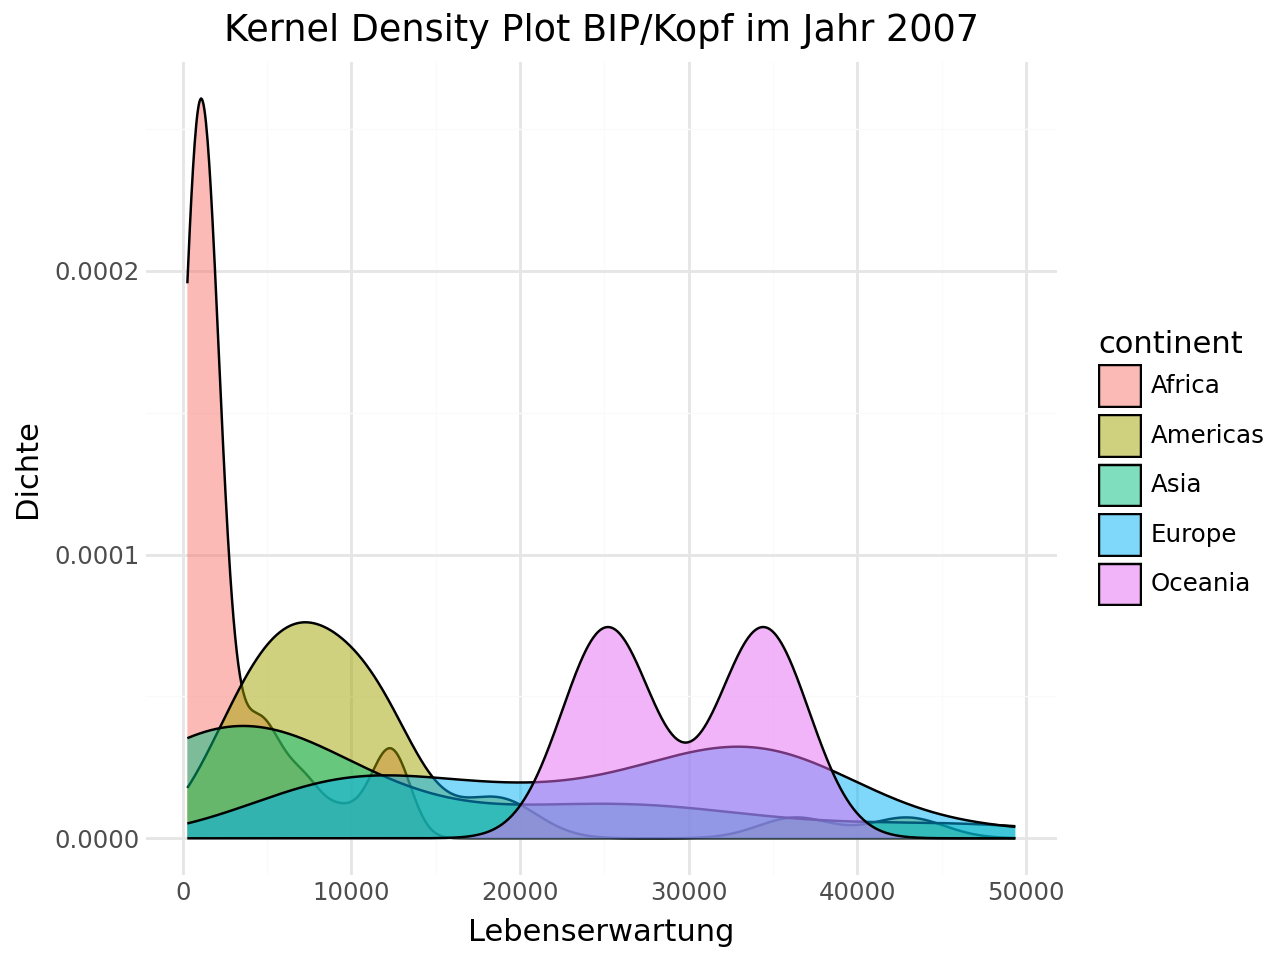

In [7]:
# Kernel density plot 2007 für gdpPercap
data_2007 = gapminder[gapminder['year'] == 2007]
(
    ggplot(data_2007, aes(x='gdpPercap', fill='continent')) +
    geom_density(alpha=0.5) +
    labs(title='Kernel Density Plot BIP/Kopf im Jahr 2007',
         x='Lebenserwartung',
         y='Dichte') +
    theme_minimal()
)

c:\Users\Matthias\anaconda3\Lib\site-packages\plotnine\stats\stat_bin.py:112: PlotnineWarning: 'stat_bin()' using 'bins = 8'. Pick better value with 'binwidth'.


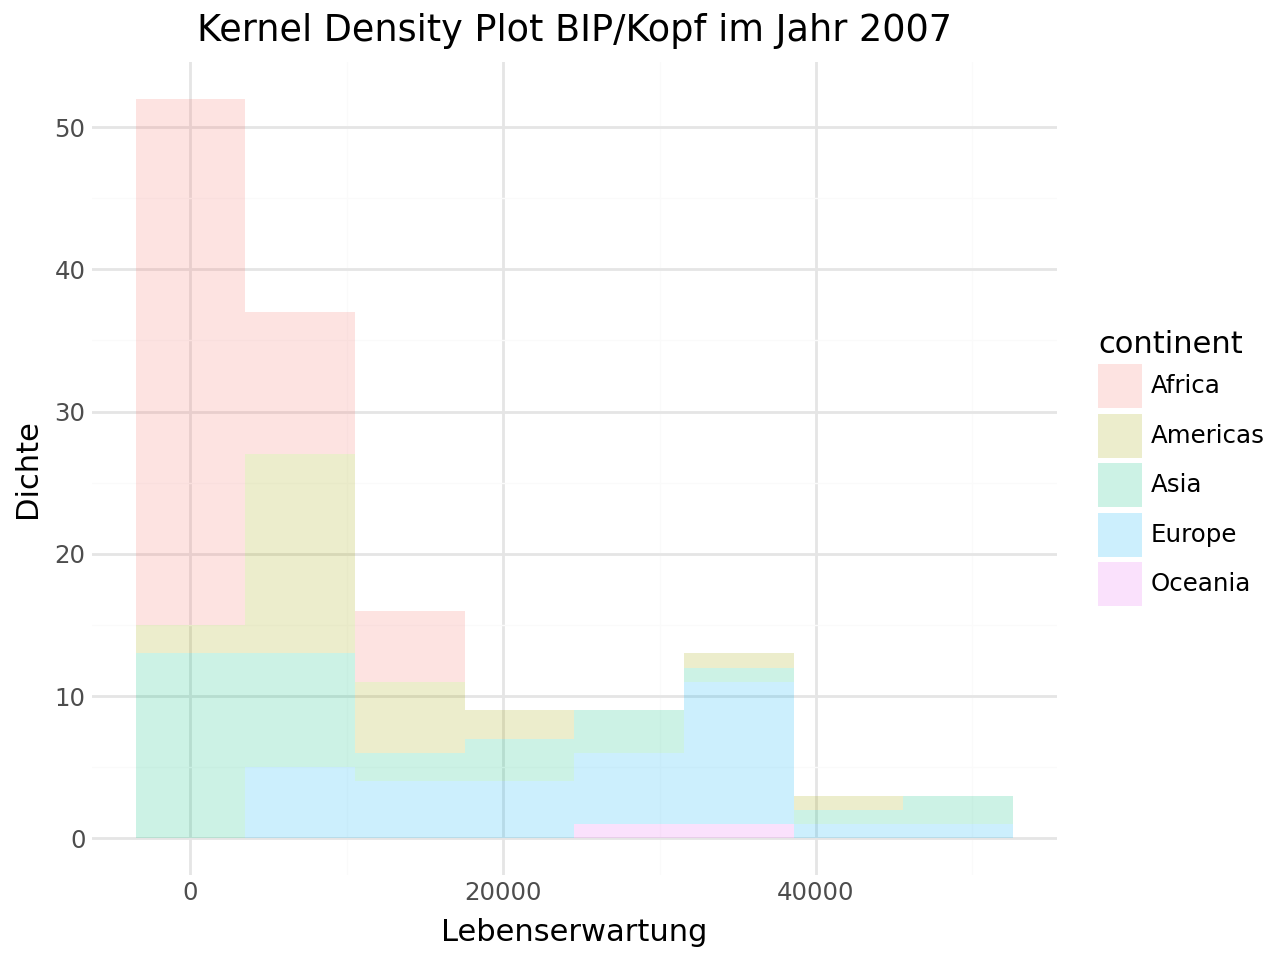

In [8]:
# histogram 2007 für gdpPercap
data_2007 = gapminder[gapminder['year'] == 2007]
(
    ggplot(data_2007, aes(x='gdpPercap', fill='continent')) +
    geom_histogram(alpha=0.2) +
    labs(title='Kernel Density Plot BIP/Kopf im Jahr 2007',
         x='Lebenserwartung',
         y='Dichte') +
    theme_minimal()
)

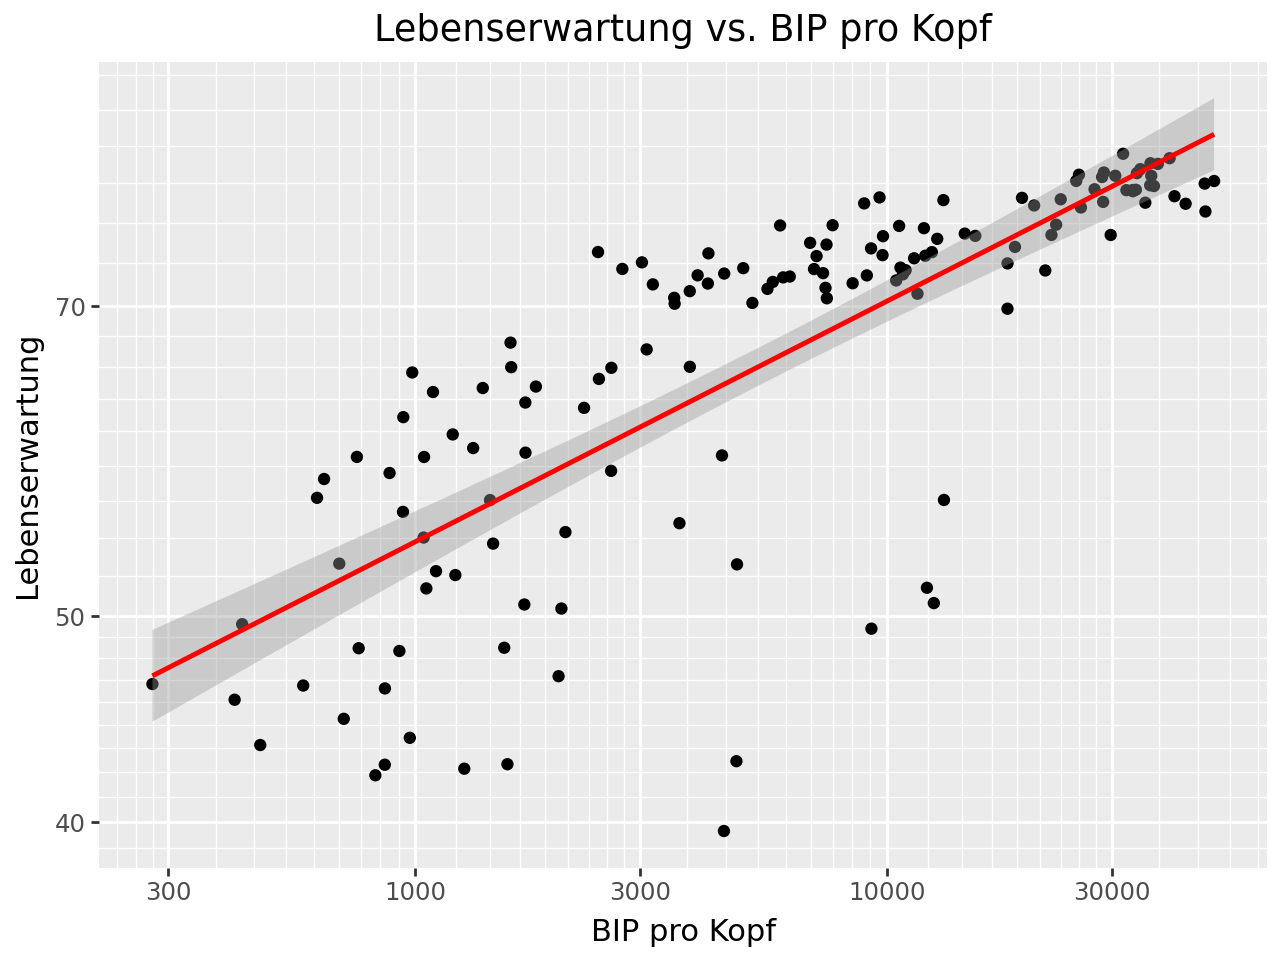

In [ ]:
# Scatterplot Lebenserwartung vs. BIP pro Kopf 2007
(ggplot(data_2007, aes(x='gdpPercap', y='lifeExp'))
 + geom_point()
 + geom_smooth(method='lm', color='red')
 + scale_x_log10()
 + scale_y_log10()
 + labs(title='Lebenserwartung vs. BIP pro Kopf',
        x='BIP pro Kopf',
        y='Lebenserwartung')
        )


# Aufgabe 1

Frage: Wie hängen Einkommen und Lebenserwartung zusammen?

Ziel: Verständnis von Aesthetic Mapping und Scale Transformation

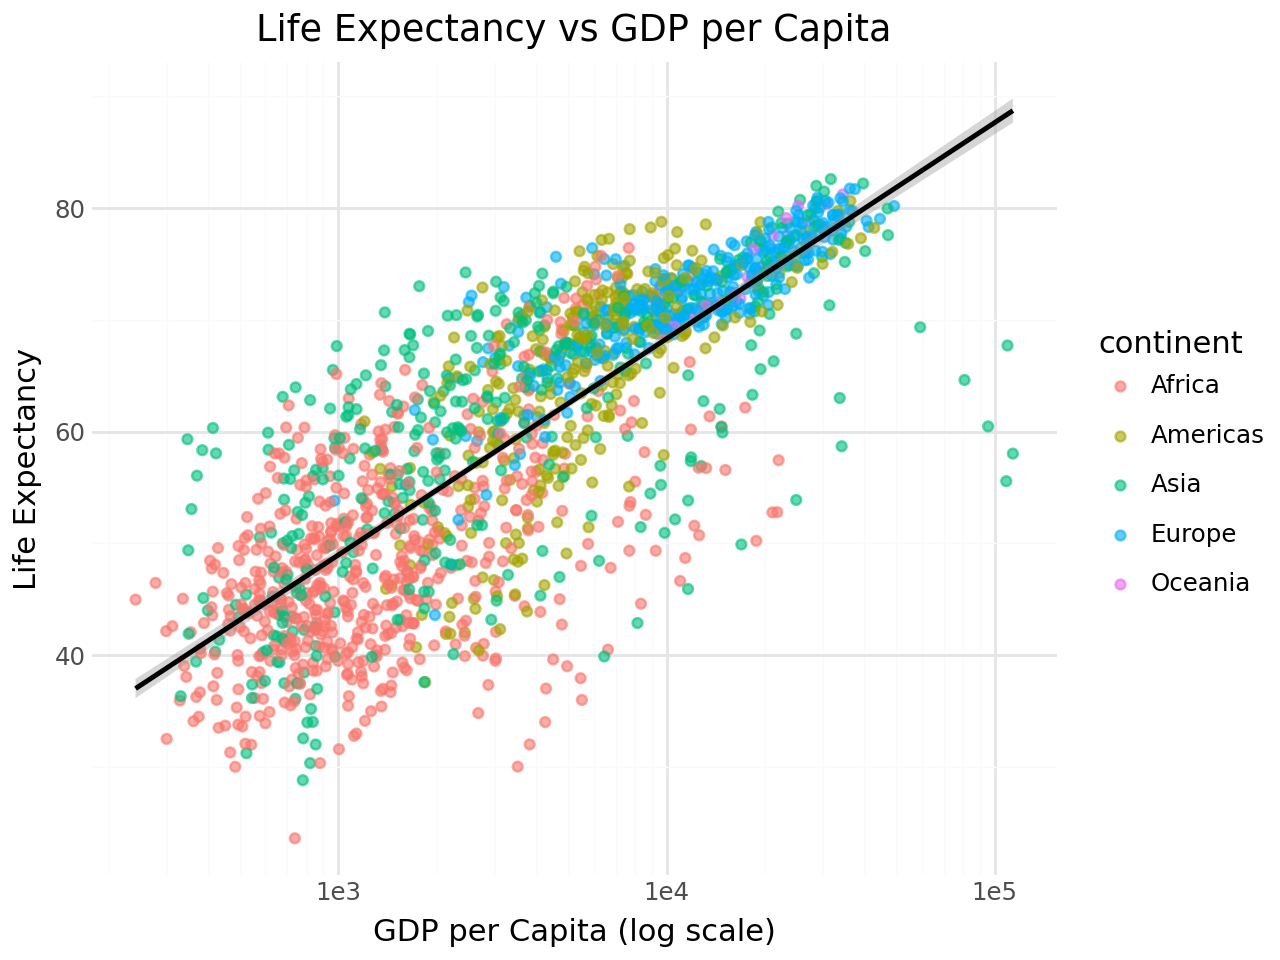

In [11]:
(ggplot(gapminder, aes(x='gdpPercap', y='lifeExp', color='continent'))
 + geom_point(alpha=0.6)
 + scale_x_log10()
 + theme_minimal()
 + geom_smooth(method='lm', color='black')
 + labs(title='Life Expectancy vs GDP per Capita',
        x='GDP per Capita (log scale)',
        y='Life Expectancy'))


📊 Interpretation: Reiche Länder haben höhere Lebenserwartung; log-Skala macht die Streuung vergleichbar.

🧠 Didaktische Erklärung:

- data: gapminder stellt die Werte bereit.
- aes(): definiert die Mappings (x, y, color).
- geom_point(): legt das Geometrische Objekt fest (Punkte).
- scale_x_log10(): verändert die Skala und damit die Wahrnehmung des Musters.
- theme_minimal(): steuert das Design der Darstellung. 

→ Zentrale Idee: Jede Grafik entsteht aus Schichten (Layern), die kombiniert werden.

# Aufgabe 2

Frage: Wie unterscheiden sich die Kontinente in der Lebenserwartung (2007)?

Ziel: Lernen, wie Geoms und Grouping Verteilungen sichtbar machen.

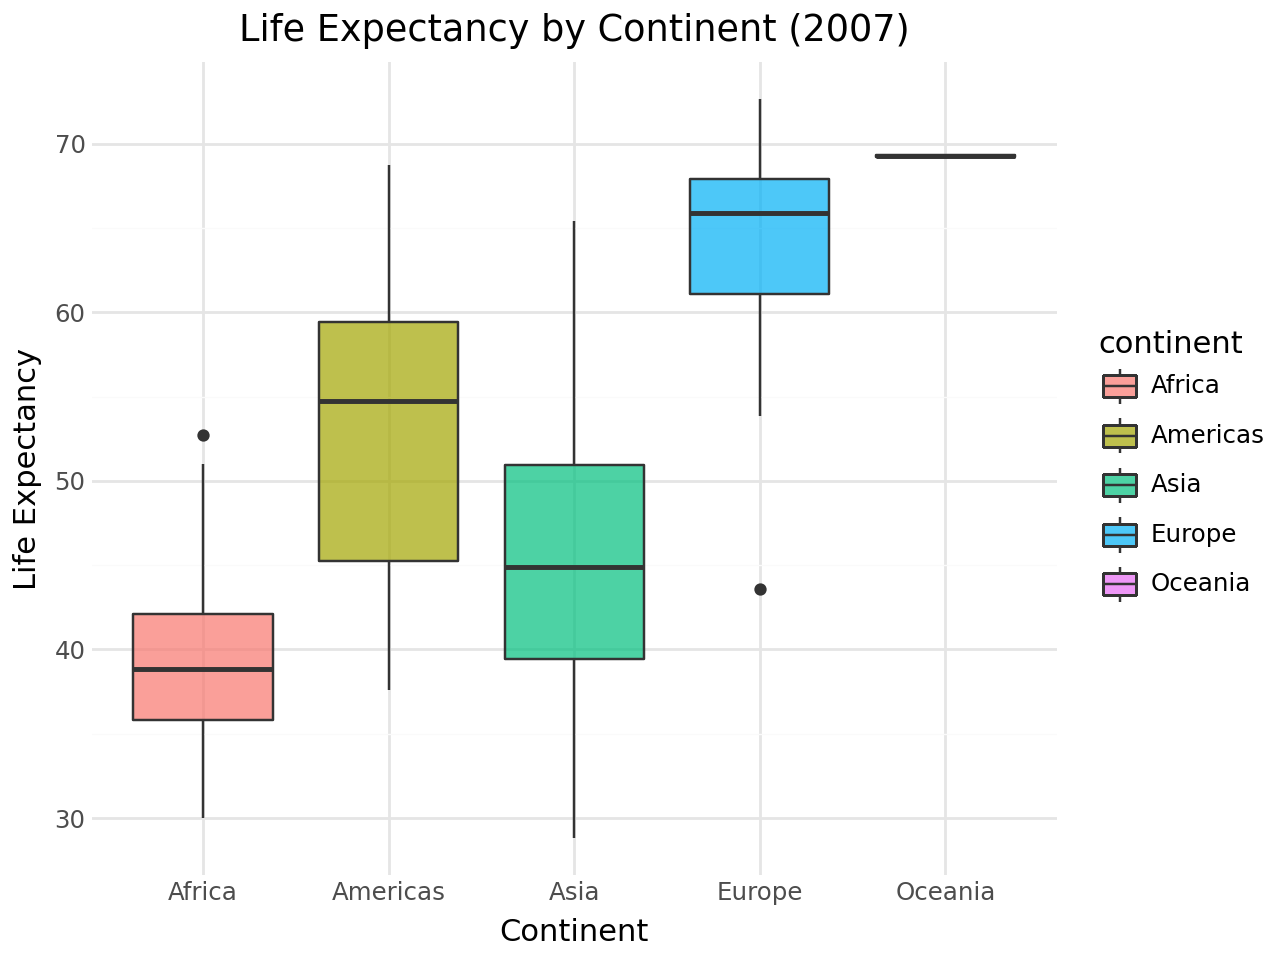

In [ ]:
gap_2007 = gapminder[gapminder['year'] == 2007]

(ggplot(gap_2007, aes('continent', 'lifeExp', fill='continent'))
 + geom_boxplot(alpha=0.7)
 + theme_minimal()
 + labs(title='Life Expectancy by Continent (2007)',
        x='Continent', y='Life Expectancy'))


📈 Interpretation: Europa und Ozeanien liegen vorn, Afrika mit geringerer Lebenserwartung und größerer Streuung.

🧠 Didaktische Erklärung:
- geom_boxplot(): anderer Geom-Typ = anderer Informationsfokus → Verteilungen statt Einzelpunkte
- fill: Färbung der Flächen, unterscheidet sich von color (Umriss).
- Grammar of Graphics erlaubt, durch Geom-Wechsel völlig neue Fragen zu stellen.

# Aufgabe 3

Frage: Wie hat sich die Lebenserwartung der Länder (nach Kontinenten) über die Zeit verändert?

Ziel: Lernen, wie Facets Teilmengen der Daten trennen und Muster sichtbar machen.

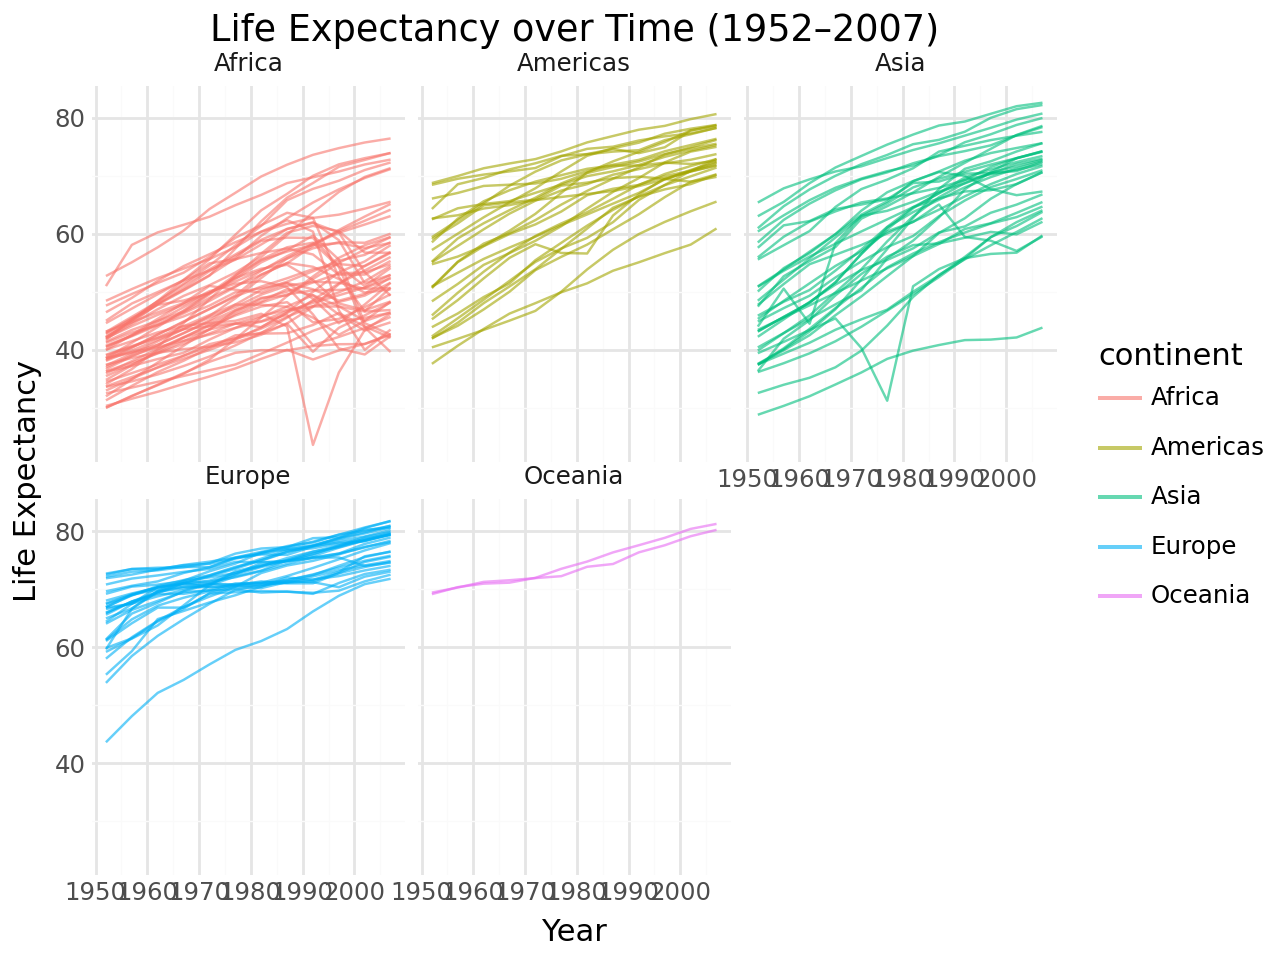

In [31]:
(ggplot(gapminder, aes('year', 'lifeExp', group='country', color='continent'))
 + geom_line(alpha=0.6)
 + facet_wrap('~continent')
 + theme_minimal()
 + labs(title='Life Expectancy over Time (1952–2007)',
        x='Year', y='Life Expectancy'))


📊 Interpretation: Alle Kontinente zeigen steigende Lebenserwartung, Afrika jedoch auf niedrigerem Niveau.

🧠 Didaktische Erklärung:

- geom_line(): verbindet Werte eines Landes → zeigt Trend.
- group: legt fest, dass Linien pro Land gezogen werden.
- facet_wrap(): unterteilt die Grafik nach Kategorien → mehrere kleine Diagramme mit gleichem Mapping.
- Facets = strukturierte Mehrfachdarstellungen — zeigen Vergleichbarkeit über Gruppen.

##### Frage: Was kann an dieser Visualisierung verbessert werden?

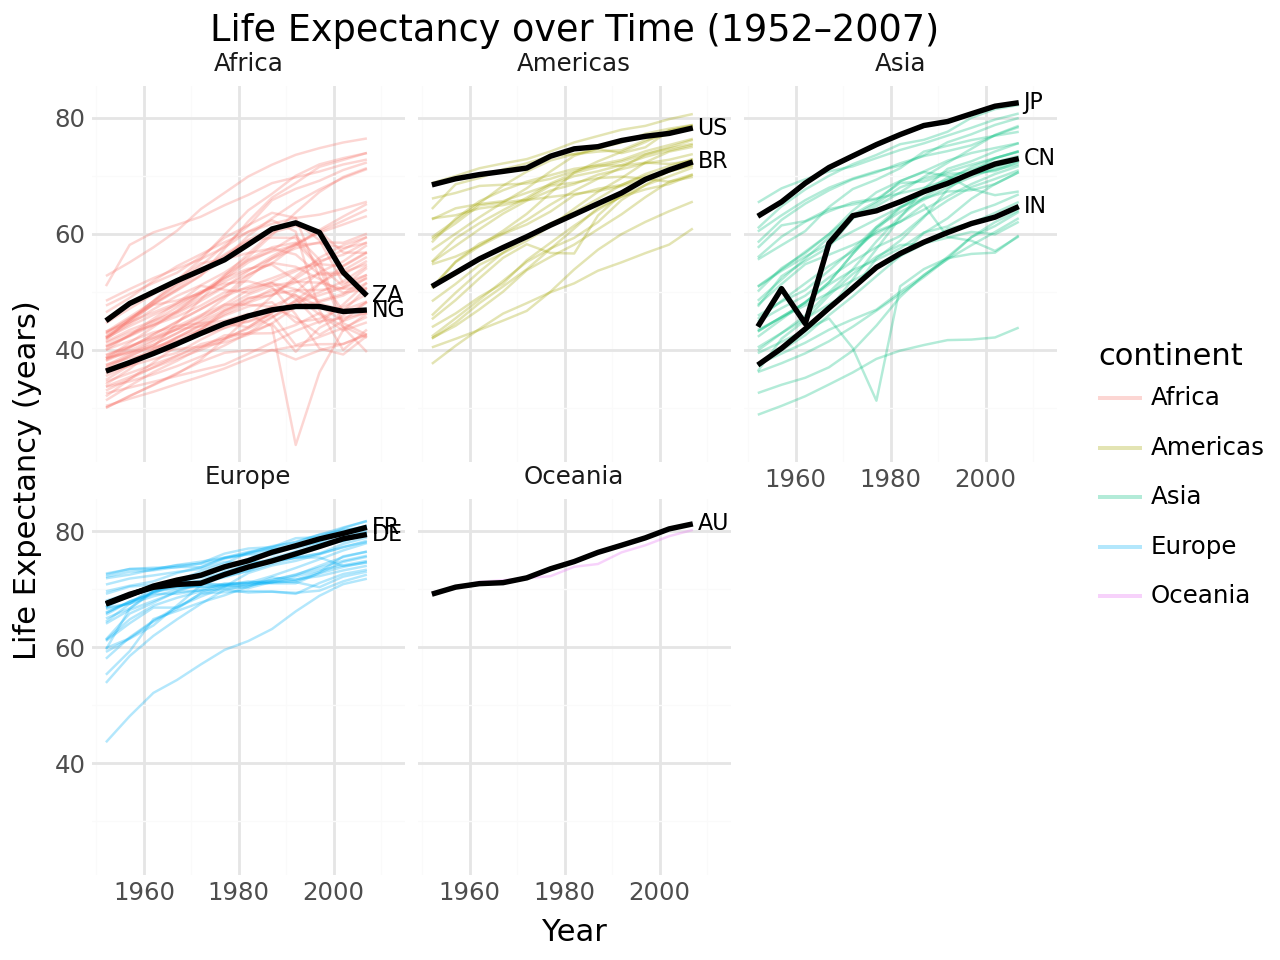

In [ ]:
# Liste der hervorzuhebenden Länder und Ländercode-Mapping
highlight_countries = ['Germany', 'France', 'Japan', 'United States', 'Nigeria', 'India', "Australia", "Brazil", "China", "South Africa"]
country_codes = {'Germany': 'DE', 'France': 'FR', 'Japan': 'JP', 'United States': 'US', 'Nigeria': 'NG', 'India': 'IN', 'Australia': 'AU', 'Brazil': 'BR', 'China': 'CN', 'South Africa': 'ZA'}

highlight_data = gapminder[gapminder['country'].isin(highlight_countries)].copy()
highlight_2007 = highlight_data[highlight_data['year'] == 2007].copy()

# Neue Spalte mit Country-Codes
highlight_2007['code'] = highlight_2007['country'].map(country_codes)

p = (ggplot(gapminder, aes(x='year', y='lifeExp', group='country', color='continent'))
     + geom_line(alpha=0.3)
     + facet_wrap('~continent')
     + theme_minimal()
     + labs(title='Life Expectancy over Time (1952–2007)',
            x='Year', y='Life Expectancy (years)'))

# Hervorhebung mehrerer Länder + Annotation mit Codes
p_highlight = (p
     + geom_line(
         mapping=aes(x='year', y='lifeExp', group='country'),
         data=highlight_data,
         color='black', size=1.1
       )
     + geom_text(
         mapping=aes(x='year', y='lifeExp', label='code'),
         data=highlight_2007,
         position=position_nudge(x=1),
         ha='left',
         color='black',
         size=8,
         show_legend=False
       )
     + scale_x_continuous(limits=[1952, 2012])
)

p_highlight

# Aufgabe 4

Frage: Wie verändern sich die globalen Muster von Wohlstand und Lebenserwartung über die Jahrzehnte hinweg? Sind die Unterschiede zwischen Kontinenten konstant, oder nähern sich Länder im Laufe der Zeit an?

Ziel: Verstehen, wie Änderungen von Zusammenhängen im Zeitverlauf visualisiert werden können – und wie man mit Facets mehrere Zeitabschnitte gleichzeitig visualisieren kann.

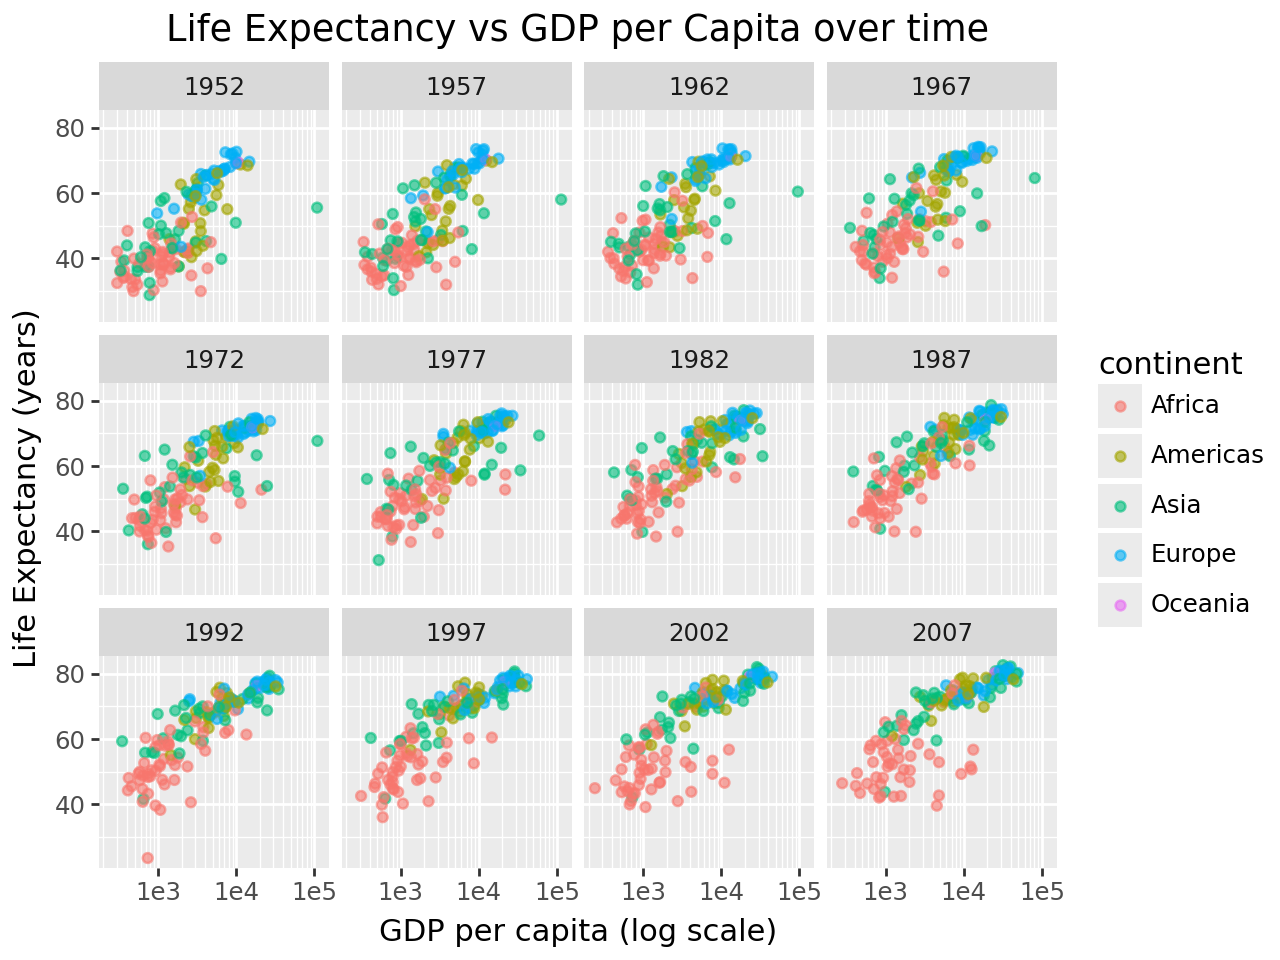

In [ ]:
(ggplot(gapminder, aes('gdpPercap', 'lifeExp', color='continent'))
 + geom_point(alpha=0.6)
 + scale_x_log10()
 + facet_wrap('~year')
 + labs(title='Life Expectancy vs GDP per Capita over time',
        x='GDP per capita (log scale)',
        y='Life Expectancy (years)'))


📊 Interpretation der Ergebnisse
- Mit zunehmenden Jahren verschieben sich die Punkte nach rechts oben → Länder werden reicher und älter.
- Die Cluster der Kontinente wandern näher zusammen → globale Annäherung in Lebenserwartung.
- Afrika bleibt mit geringem Einkommen und niedriger Lebenserwartung zurück, zeigt aber Zuwächse.
- Faceting erlaubt eine visuelle Zeitreise durch Jahrzehnte — dieselben Mappings, aber verschiedene Teilmengen.

🧠 Didaktische Erklärung:
- `data`: legt die Datenquelle fest → Was wird gezeigt? → Beispiel: gapminder
- `aes()`: definiert das Mapping → Wie werden Daten visuell kodiert? → x = gdpPercap, y = lifeExp, color = continent
- `geom_point()`: bestimmt die Darstellungsform → Was wird gezeichnet? → Punkte für Länder im Streudiagramm
- `scale_x_log10()`: verändert die Skala → Wie wird der Wertebereich abgebildet? → Logarithmische Darstellung für bessere Vergleichbarkeit
- `facet_wrap('~year')`: teilt nach Gruppen → Wie werden Teilmengen gezeigt? → Ein Plot pro Jahr zur Zeitreihenanalyse
- `labs()`: ergänzt Kontext → Wie wird erklärt, was gezeigt wird? → Titel, Achsen, Legende
- `alpha = 0.6`: steuert Sichtbarkeit → Wie klar ist das Bild? → leichte Transparenz gegen Überlagerung

- Facets sind keine neue Art von Plot, sondern eine systematische Anwendung der gleichen Grammatik auf Teilmengen der Daten.
- Der Code zeigt, dass das “Baukastenprinzip” der Grammar of Graphics erweiterbar ist:
→ `data + aes + geom + scale + facet + theme + labels`
Besonders geeignet zur Demonstration des Konzepts „same grammar – multiple stories“.
